# Homework 1
*Sean Steinle*

### Contents
- [Introduction](#Introduction)
- [Winsorized Mean](#Winsorized-Mean)
- [Empirical Study](#Empirical-Study)

## Introduction


- *how you would want me to address you (do you have preferred pronouns?) and if the proper pronunciation of your name?*
    - You can address me as Sean or he/him/his pronouns! The pronunication is sh-on.
- *your educational and professional background?*
    - I graduated with my BS in Computer Science and BA in Linguistics from the Univerity of Pittsburgh in 2022. I started as a full-time Software Engineer with the MITRE Corporation in 2022. My first year I built software to support Reinforcement Learning research, but now I lead an Explainable AI research project and work on a Federated Learning project. I love building things and I love AI. I am drawn to Statistics because it can serve as a new perspective into concepts I'm already familiar with. Specifically I would like to learn more about Bayesian approaches and optimization!
- *your experience with computing and specifically statistical computing?*
    - Coding is my day job, though I'm always looking to learn more. I know a decent bit about High Performance Computing and relevant topics like parallelization, and I'm familiar with tools like Slurm and htop.
- *your proficiency with R and any other programming language you know?*
    - I have experience with Python, Julia, and R (in that order) but also some other languages like Java, C, PDDL, and Javascript. I would feel comfortable using R if necessary, but I prefer Python because it has OOP, lots of documentation, and lots of libraries.
- *anything you would want me to know about yourself or your background?*
    - My biggest area of weakness with respect to this class will likely be the statistical concepts themselves, which I am very excited to work on! I hope that I'm able to help others with computing concepts in exchange for help with statistics concepts.

## Winsorized Mean

In [116]:
def mean(values: list):
    
    return sum(values)/len(values)

In [1]:
def winsorized_mean(values: list, threshold: float):
    """Calculates the Winsorized mean for a set of values.
    
    values - The first argument is the list of numbers for which the Winsorized mean will be calculated
    threshold - The second argument is the threshold above/below which values will be pruned
    """
    wvalues = [] #could directly modify values, but don't want to modify passed in data structure
    for value in values:
        if abs(value) > threshold: #value is an outlier, replace with threshold
            if value >= 0: #value should be replaced by threshold with same sign
                wvalues.append(threshold)
            else:
                wvalues.append(-threshold)
        else: #value is not an outlier, add it
            wvalues.append(value)
    wmean = mean(wvalues) #now take the classical mean of the transformed values
    return wmean

In [118]:
#Test Cases:

#TC1 - no chopping should apply when threshold is greater than any element in the list! 
assert winsorized_mean([1,2,3,4,5,6,7,8,9,10], 11) == 5.5

#TC2 - chopping occurs equally and therefore doesn't affect mean
assert [winsorized_mean([-5,-4,-3,-2,-1,1,2,3,4,5], t) for t in [5,3,1]] == [0.0, 0.0, 0.0]

#TC3 - chopping only occurs on one side
assert [winsorized_mean([-7,-6,-5,-4,-3,-2,-1,1,2,3], t) for t in [5,3,1]] == [-1.9, -1.2, -0.4]

#TC4 - the winsorized mean always tends approaches the threshold when the threshold is low relative to the set!
#note: this would be a great way to test performance! my implementation is memory inefficient.
for N in [10,100,1000,10000,100000,1000000]:
    wm = winsorized_mean(range(0,N),1)
    assert wm-1/N < wm < wm+1/N
    
#TC5 - the function doesn't modify data you pass in
mydata = [1,2,3]
winsorized_mean(mydata, 1)
assert mydata == [1,2,3]

## Empirical Study

In [119]:
#read in data, drop column name, cast data to floats
path = "data/homework_01-data.csv"
with open(path, newline='') as file:
    lines = file.read().splitlines()[1:]
values = [float(line) for line in lines]
#see https://docs.python.org/3/library/csv.html for more details!

In [130]:
#create list of thresholds, calculate wmean for each threshold
thresholds = [x/2 for x in range(1, 401)]
wvalues = [winsorized_mean(values, threshold) for threshold in thresholds]

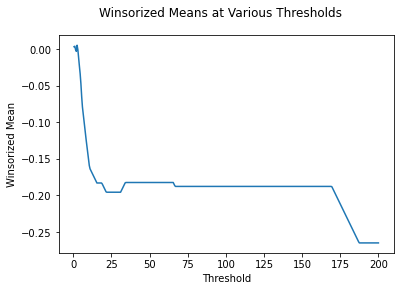

In [150]:
#see https://stackoverflow.com/questions/12444716/how-do-i-set-the-figure-title-and-axes-labels-font-size for specific commands!
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(thresholds,wvalues)
fig.suptitle("Winsorized Means at Various Thresholds")
plt.xlabel("Threshold")
plt.ylabel("Winsorized Mean")
plt.savefig("figures/wmean.png")

As the threshold for a winsorized mean function approaches 0, the winsorized mean result approaches 0. As the threshold for a winsorized mean approaches the maximum absolute value in the dataset, it converges to the true mean of the dataset.

The plot flattens out around a threshold of 25, which suggests that there are only a few values greater than 25. We can confirm this with a histogram. 

Because the direction of the plot is almost monotonically negative, it seems like most values are negative--as more values are "permitted into the mean calculation", the winsorized mean drops! There is a small exception to the negative trend: around a threshold of 25, the mean increases. This tells us a value between 25-30 is in the dataset!

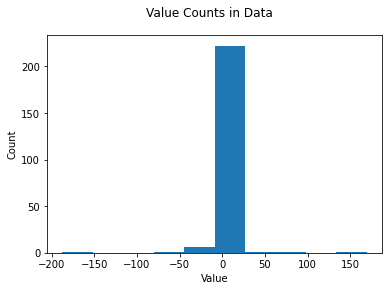

In [151]:
fig = plt.figure()
plt.hist(values)
fig.suptitle("Value Counts in Data")
plt.xlabel("Value")
plt.ylabel("Count")
plt.savefig("figures/histogram.png")

As expected, most values are within 25 of 0.